In [ ]:
options(width = 200)

In [ ]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(ggplot2)
library(dplyr)

In [ ]:
df <- read_excel("/content/Projeto Aplicado I - Dataset.xlsx")

In [ ]:
head(df)

Condição do produtor em relação às terras,Grupos de atividade econômica,Produto,Número de estabelecimentos agropecuários com agroindústria rural (Unidades),Quantidade produzida na agroindústria rural,Quantidade vendida de produtos da agroindústria rural,unidade de medida,Valor da produção da agroindústria rural (Mil Reais),Valor da venda de produtos da agroindústria rural (Mil Reais)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Proprietário(a),Produção de lavouras temporárias,Aguardente de cana,5954,57702,46628,Mil litros,225012,166062
Proprietário(a),Produção de lavouras temporárias,Algodão em pluma,117,410613,359804,Toneladas,2139603,1852549
Proprietário(a),Produção de lavouras temporárias,Caroço de algodão,27,147693,115080,Toneladas,70725,55952
Proprietário(a),Produção de lavouras temporárias,Arroz em grão,10852,28932,22003,Toneladas,43482,28065
Proprietário(a),Produção de lavouras temporárias,Café torrado em grão,224,98,79,Toneladas,717,591
Proprietário(a),Produção de lavouras temporárias,Café torrado e moído,1567,476,411,Toneladas,5560,4690


## Analise inicial dos dados

*   Numero de exemplares
*   Tipos de dados
*   Medidas de posição e dispersão

In [ ]:
## 1.0 Número de exemplares (linhas) e dimensões (colunas)
nrow(df)
ncol(df)

[1] 2081

[1] 9

In [ ]:
## 2.0 Tipo dos dados
str(df) #Alternativa 1
sapply(df, class) #Alternativa 2

tibble [2,081 × 9] (S3: tbl_df/tbl/data.frame)
 $ Condição do produtor em relação às terras                                  : chr [1:2081] "Proprietário(a)" "Proprietário(a)" "Proprietário(a)" "Proprietário(a)" ...
 $ Grupos de atividade econômica                                              : chr [1:2081] "Produção de lavouras temporárias" "Produção de lavouras temporárias" "Produção de lavouras temporárias" "Produção de lavouras temporárias" ...
 $ Produto                                                                    : chr [1:2081] "Aguardente de cana" "Algodão em pluma" "Caroço de algodão" "Arroz em grão" ...
 $ Número de estabelecimentos agropecuários com agroindústria rural (Unidades): num [1:2081] 5954 117 27 10852 224 ...
 $ Quantidade produzida na agroindústria rural                                : num [1:2081] 57702 410613 147693 28932 98 ...
 $ Quantidade vendida de produtos da agroindústria rural                      : num [1:2081] 46628 359804 115080 22003 79 ...
 $ 

Condição do produtor em relação às terras 
                                                                "character" 
                                              Grupos de atividade econômica 
                                                                "character" 
                                                                    Produto 
                                                                "character" 
Número de estabelecimentos agropecuários com agroindústria rural (Unidades) 
                                                                  "numeric" 
                                Quantidade produzida na agroindústria rural 
                                                                  "numeric" 
                      Quantidade vendida de produtos da agroindústria rural 
                                                                  "numeric" 
                                                          unidade de medida 
                                                                "character" 
                       Valor da produção da agroindústria rural (Mil Reais) 
                                                                  "numeric" 
              Valor da venda de produtos da agroindústria rural (Mil Reais) 
                                                                  "numeric"

In [ ]:
## 3.0 Medidas de posição e dispersão
summary(df)

 Condição do produtor em relação às terras Grupos de atividade econômica
 Length:2081                               Length:2081                  
 Class :character                          Class :character             
 Mode  :character                          Mode  :character             
                                                                        
                                                                        
                                                                        
                                                                        
   Produto         
 Length:2081       
 Class :character  
 Mode  :character  
                   
                   
                   
                   
 Número de estabelecimentos agropecuários com agroindústria rural (Unidades)
 Min.   :      0                                                            
 1st Qu.:      0                                                            
 Median :      4         

#4. Distribuição e frequência

In [ ]:
## 4.1 Distribuição e frequência
data_summary <- aggregate(
  cbind(
    `Quantidade produzida na agroindústria rural`
  ) ~ `Produto` + `unidade de medida`,
  data = df,
  FUN = sum,
  na.rm = TRUE
)

print(data_summary)


                                 Produto  unidade de medida
1                     Aguardente de cana         Mil litros
2                       Algodão em pluma         Mil litros
3                                Cajuína         Mil litros
4                Carne de bovinos(verde)         Mil litros
5                         Creme de leite         Mil litros
6                                Licores         Mil litros
7                               Manteiga         Mil litros
8                                 Melado         Mil litros
9                         Óleos vegetais         Mil litros
10               Pães, bolos e biscoitos         Mil litros
11                       Sucos de frutas         Mil litros
12                          Vinho de uva         Mil litros
13                       Outros produtos Mil metros cúbicos
14                   Produtos de madeira Mil metros cúbicos
15                    Aguardente de cana          Toneladas
16                      Algodão em pluma

In [ ]:
## 4.2 Número de estabelecimentos agropecuários por produto

data_estabelecimentos <- aggregate(
  `Número de estabelecimentos agropecuários com agroindústria rural (Unidades)` ~ `Produto`,
  data = df,
  FUN = sum,
  na.rm = TRUE
)

data_estabelecimentos$Porcentagem <- (data_estabelecimentos$`Número de estabelecimentos agropecuários com agroindústria rural (Unidades)` /
                                       sum(data_estabelecimentos$`Número de estabelecimentos agropecuários com agroindústria rural (Unidades)`)) * 100
result_total_estabelecimento <- data.frame(
    Produto = data_estabelecimentos$Produto,
    Total_Estabelecimentos = data_estabelecimentos$`Número de estabelecimentos agropecuários com agroindústria rural (Unidades)`,
    Porcentagem = round(data_estabelecimentos$Porcentagem, 2)
  )
print(result_total_estabelecimento)

                                 Produto Total_Estabelecimentos Porcentagem
1                     Aguardente de cana                  11028        0.72
2                       Algodão em pluma                    266        0.02
3                          Arroz em grão                  34631        2.27
4                   Café torrado e moído                  11318        0.74
5                   Café torrado em grão                   1571        0.10
6                                Cajuína                    780        0.05
7                Carne de bovinos(verde)                 120561        7.89
8         Carne de outros animais(verde)                 121695        7.97
9                 Carne de suínos(verde)                 147543        9.66
10        Carne tratada(de sol, salgada)                   3120        0.20
11                     Caroço de algodão                     51        0.00
12                        Carvão vegetal                  57772        3.78
13          

In [ ]:
## 4.3 Valor da venda e sua porcentagem

data_valor_venda <- aggregate(
  `Valor da venda de produtos da agroindústria rural (Mil Reais)` ~ `Produto`,
  data = df,
  FUN = sum,
  na.rm = TRUE
)
data_valor_venda$Porcentagem <- (data_valor_venda$`Valor da venda de produtos da agroindústria rural (Mil Reais)` / sum(data_valor_venda$`Valor da venda de produtos da agroindústria rural (Mil Reais)`)) * 100

result_total_valor_vendas <- data.frame(
    Produto = data_valor_venda$Produto,
    Ttl_vlr_venda_mil_brl = data_valor_venda$`Valor da venda de produtos da agroindústria rural (Mil Reais)`,
    Porcentagem = round(data_valor_venda$Porcentagem, 2)
  )

print(result_total_valor_vendas)


                                 Produto Ttl_vlr_venda_mil_brl Porcentagem
1                     Aguardente de cana                264399        2.46
2                       Algodão em pluma               2533833       23.56
3                          Arroz em grão                 36316        0.34
4                   Café torrado e moído                 57473        0.53
5                   Café torrado em grão                 49135        0.46
6                                Cajuína                  6553        0.06
7                Carne de bovinos(verde)                207880        1.93
8         Carne de outros animais(verde)                126749        1.18
9                 Carne de suínos(verde)                 94794        0.88
10        Carne tratada(de sol, salgada)                  3197        0.03
11                     Caroço de algodão                 55952        0.52
12                        Carvão vegetal               1835863       17.07
13                       

In [ ]:
## 4.4 Valor da produção e sua porcentagem
data_valor_producao <- aggregate(
  `Valor da produção da agroindústria rural (Mil Reais)` ~ `Produto`,
  data = df,
  FUN = sum,
  na.rm = TRUE
)
data_valor_producao$Porcentagem <- (data_valor_producao$`Valor da produção da agroindústria rural (Mil Reais)` / sum(data_valor_producao$`Valor da produção da agroindústria rural (Mil Reais)`)) * 100

result_total_valor_prod <- data.frame(
    Produto = data_valor_producao$Produto,
    Ttl_vlr_prod_mil_brl = data_valor_producao$`Valor da produção da agroindústria rural (Mil Reais)`,
    Porcentagem = round(data_valor_producao$Porcentagem, 2)
  )

print(result_total_valor_prod)

                                 Produto Ttl_vlr_prod_mil_brl Porcentagem
1                     Aguardente de cana               351940        2.39
2                       Algodão em pluma              2851891       19.34
3                          Arroz em grão                78227        0.53
4                   Café torrado e moído                70441        0.48
5                   Café torrado em grão                68185        0.46
6                                Cajuína                 8223        0.06
7                Carne de bovinos(verde)               568044        3.85
8         Carne de outros animais(verde)               282898        1.92
9                 Carne de suínos(verde)               338398        2.30
10        Carne tratada(de sol, salgada)                 5974        0.04
11                     Caroço de algodão                70725        0.48
12                        Carvão vegetal              1984460       13.46
13                        Couros e pel

In [ ]:
## 4.5 Número de estabelecimentos agropecuários por condição do produtor em relação as terras
data_estab_condicao_produtor <- aggregate(
  `Número de estabelecimentos agropecuários com agroindústria rural (Unidades)` ~ `Condição do produtor em relação às terras`,
  data = df,
  FUN = sum,
  na.rm = TRUE
)

data_estab_condicao_produtor$Porcentagem <- (data_estab_condicao_produtor$`Número de estabelecimentos agropecuários com agroindústria rural (Unidades)` /
                                       sum(data_estab_condicao_produtor$`Número de estabelecimentos agropecuários com agroindústria rural (Unidades)`)) * 100

result_total_estab_condicao_produtor <- data.frame(
    Condição_produtor_relação__terras = data_estab_condicao_produtor$`Condição do produtor em relação às terras`,
    Total_Estabelecimentos = data_estab_condicao_produtor$`Número de estabelecimentos agropecuários com agroindústria rural (Unidades)`,
    Porcentagem = round(data_estab_condicao_produtor$Porcentagem, 2)
  )

print(result_total_estab_condicao_produtor)

                                  Condição_produtor_relação__terras Total_Estabelecimentos Porcentagem
1                                                   Arrendatário(a)                  31839        2.08
2                                                    Comodatário(a)                  63438        4.15
3 Concessionário(a) ou assentado(a) aguardando titulação definitiva                  95826        6.28
4                                                          Ocupante                  46178        3.02
5                                                       Parceiro(a)                  25927        1.70
6                                                 Produtor sem área                  23449        1.54
7                                                   Proprietário(a)                1240399       81.23


# Correlações, valores perdidos, anomalias e outliers



In [ ]:
## 5.0 Correlações
numeric_cols <- sapply(df, is.numeric)
cor(df[, numeric_cols], use="complete.obs")

,Número de estabelecimentos agropecuários com agroindústria rural (Unidades),Quantidade produzida na agroindústria rural,Quantidade vendida de produtos da agroindústria rural,Valor da produção da agroindústria rural (Mil Reais),Valor da venda de produtos da agroindústria rural (Mil Reais)
Número de estabelecimentos agropecuários com agroindústria rural (Unidades),1.0000000,0.9085529,0.8962767,0.9767605,0.9675496
Quantidade produzida na agroindústria rural,0.9085529,1.0000000,0.9994630,0.9390633,0.9406525
Quantidade vendida de produtos da agroindústria rural,0.8962767,0.9994630,1.0000000,0.9295282,0.9326341
Valor da produção da agroindústria rural (Mil Reais),0.9767605,0.9390633,0.9295282,1.0000000,0.9970688
Valor da venda de produtos da agroindústria rural (Mil Reais),0.9675496,0.9406525,0.9326341,0.9970688,1.0000000


In [ ]:
## 6.0 Valores perdidos ou incorretos

sum(is.na(df))
colSums(is.na(df))


[1] 13

Condição do produtor em relação às terras                                               Grupos de atividade econômica 
                                                                          2                                                                           2 
                                                                    Produto Número de estabelecimentos agropecuários com agroindústria rural (Unidades) 
                                                                          2                                                                           1 
                                Quantidade produzida na agroindústria rural                       Quantidade vendida de produtos da agroindústria rural 
                                                                          1                                                                           1 
                                                          unidade de medida                        Valor da produção da agroindústria rural (Mil Reais) 
                                                                          2                                                                           1 
              Valor da venda de produtos da agroindústria rural (Mil Reais) 
                                                                          1

In [ ]:
## 7.0 Identificação de outliers

## 7.1 Outliers de numero de estabelecimentos por condicao do produtor
data_condicao_terras <- aggregate(
  `Número de estabelecimentos agropecuários com agroindústria rural (Unidades)` ~ `Condição do produtor em relação às terras`,
  data = df,
  FUN = function(x) c(Media = mean(x, na.rm = TRUE), Minimo = min(x, na.rm = TRUE), Maximo = max(x, na.rm = TRUE))
)
print(data_condicao_terras)

                          Condição do produtor em relação às terras Número de estabelecimentos agropecuários com agroindústria rural (Unidades).Media
1                                                   Arrendatário(a)                                                                         107.20202
2                                                    Comodatário(a)                                                                         213.59596
3 Concessionário(a) ou assentado(a) aguardando titulação definitiva                                                                         322.64646
4                                                          Ocupante                                                                         155.48148
5                                                       Parceiro(a)                                                                          87.29630
6                                                 Produtor sem área                                 

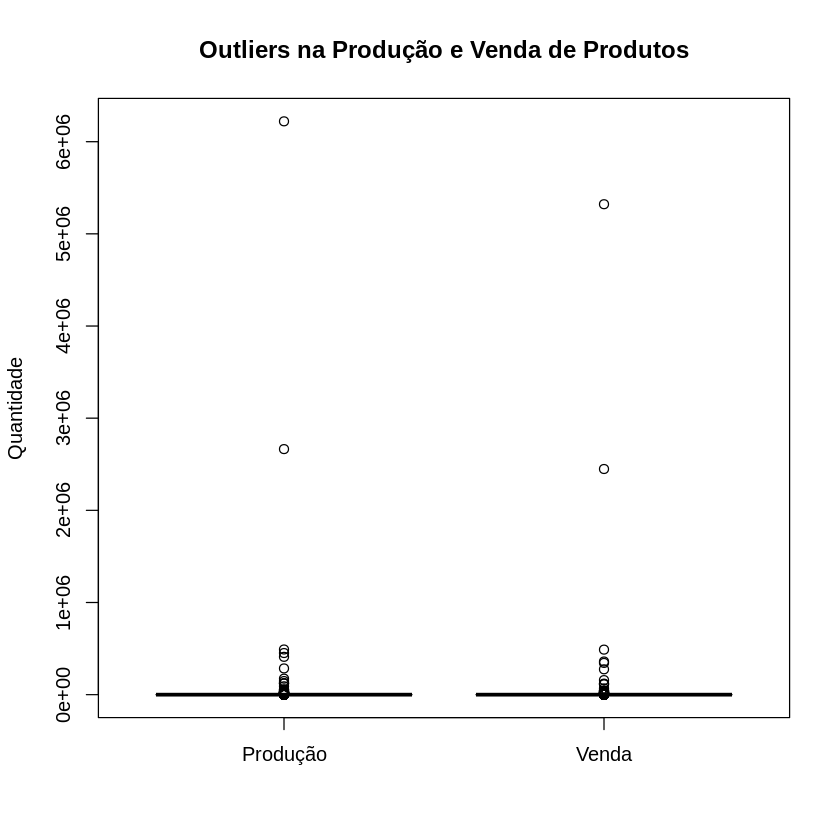

In [ ]:
## 7.2 Outliers de quantidade de producao e venda de produtos
  # Possivel ver que os outliers e o comportamento geral do grafico de producao é superior consideravelmente ao de venda
  # indicando uma possivel falta de demanda e excesso de oferta do setor agro.

boxplot(
  df$`Quantidade produzida na agroindústria rural`,
  df$`Quantidade vendida de produtos da agroindústria rural`,
  names = c("Produção", "Venda"),
  main = "Outliers na Produção e Venda de Produtos",
  ylab = "Quantidade",
  col = c("green", "orange")
)